In [1]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02)
PLS.add_Injector()

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = PLS.Variable('Bp1', varMin=1e-2, varMax=.45)
Bp2 = PLS.Variable('Bp2', varMin=1e-2, varMax=.45)
Bp3 = PLS.Variable('Bp3', varMin=1e-2, varMax=.45)
Bp4 = PLS.Variable('Bp4', varMin=1e-2, varMax=.45)

rp1 = PLS.Variable('rp1', varMin=.005, varMax=.02)
rp2 = PLS.Variable('rp2', varMin=.005, varMax=.02)
rp3 = PLS.Variable('rp3', varMin=.005, varMax=.02)
rp4 = PLS.Variable('rp4', varMin=.005, varMax=.02)


L1Space=PLS.mathVariable(rp1,3)
L2Space=PLS.mathVariable(rp2,3)
L3Space=PLS.mathVariable(rp3,3)
L4Space=PLS.mathVariable(rp4,3)

r0=1
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(np.pi, r0, .45)
PLS.add_Drift(L=L4Space)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
PLS.add_Drift(L=L1Space)
PLS.add_Bend(np.pi, r0, .45)
PLS.add_Drift(L=L2Space)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
PLS.add_Drift(L=L3Space)
PLS.end_Lattice()

Lattice model completed


100%|██████████| 3000/3000 [13:07:39<00:00, 15.75s/it]  


minCost for each thread:  [1.27237622 1.24785383 1.09013559 1.51989205 1.26172567 1.22486724
 1.33273515 1.49926962 1.43589388 1.43295006 1.20680402 1.49587027
 1.31971732 1.60653734 1.1950877  1.5530874  1.19891666 1.20232868
 1.19504757 1.32804258 1.23574272 1.22087222 1.21737127 1.30951385
 1.22017889 1.27641003 1.2349957  1.20563691 1.22737534 1.52776763
 1.47313564 1.469957  ]


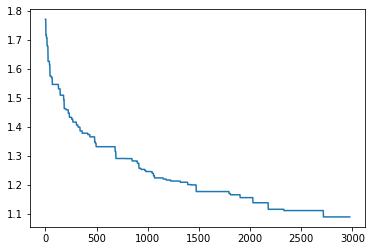

[0.39223015 0.29965505 0.38421841 0.2958737  0.16960136 0.19285413
 0.16625608 0.22277454 0.02       0.01900761 0.01986514 0.01982712
 0.73126147 1.5        0.19997697 0.12454002 0.00220297] 1.0901355926330936
percent particles surviving (x,y): 49.4, 33.3
[0.39223015 0.29965505 0.38421841 0.2958737  0.16960136 0.19285413
 0.16625608 0.22277454 0.02       0.01900761 0.01986514 0.01982712
 0.73126147 1.5        0.19997697 0.12454002 0.00220297] 1.0901355926330936
done
Total time 787 minutes and 41 seconds


In [4]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=.75, crossPop=.7, iterations=3000, popPerDim=40,strategy='best/1')

[0.3922 0.2997 0.3842 0.2959 0.1696 0.1929 0.1663 0.2228 0.02   0.019
 0.0199 0.0198 0.7313 1.5   ]


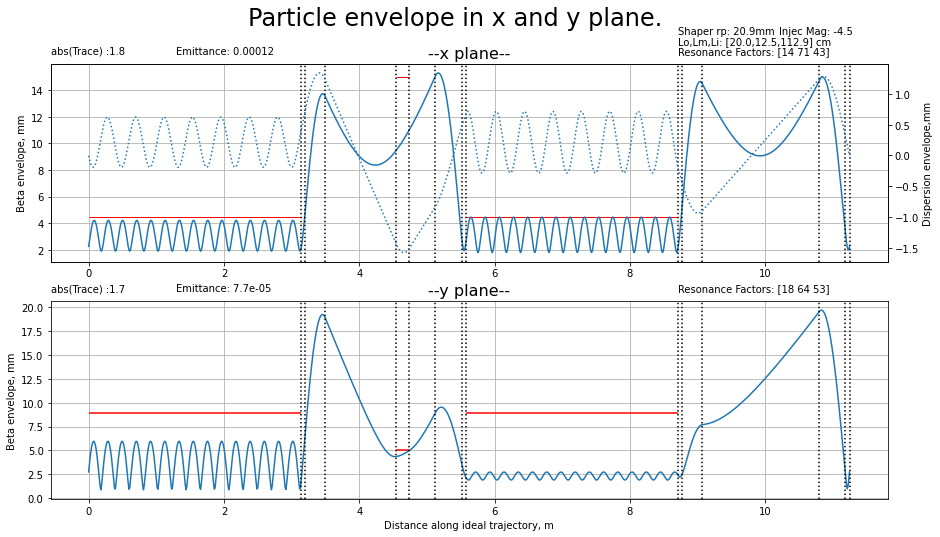

In [5]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

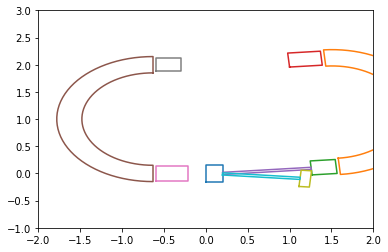

4.0

In [6]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()

In [5]:
Lo=minimizer.sol.Lo
Lm=minimizer.sol.Lm
s0=minimizer.sol.sOffset
minimizer.PLS.injector.rpFunc(Lo,Lm,0)

0.020858513421854352